In [ ]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=be93ce5fef5a92a6f2a0f6144645b8a6c4a41ea487f74e50a4e956a987a79a33
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [ ]:
from pyforest import*

In [ ]:
df = pd.read_csv("/content/sample_data/pima-indians-diabetes.csv")

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().values.any()

False

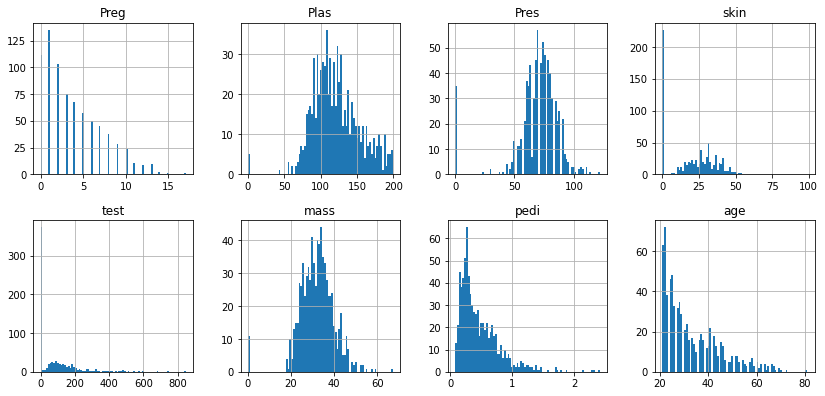

In [ ]:
columns = list(df)[0:-1]
df[columns].hist(bins=80, figsize=(14,50), layout=(14,4));

In [ ]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['class'], axis=1)
y = df['class']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
x_train

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [ ]:
print("{} data is in training set".format(len(x_train)/len(df) * 100))
print("{} data is in test set ".format(len(x_test)/len(df) * 100))

69.921875 data is in training set
30.078125 data is in test set 


In [ ]:
from sklearn.impute import SimpleImputer

replace = SimpleImputer(missing_values=0, strategy='mean')

cols = x_train.columns

x_train = pd.DataFrame(replace.fit_transform(x_train))
x_test = pd.DataFrame(replace.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from pyforest import*

In [ ]:
x_train

,0,1,2,3,4,5,6,7
0,15.000000,136.0,70.0,32.000000,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.000000,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.000000,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.000000,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.000000,158.243346,35.2,0.197,29.0
...,...,...,...,...,...,...,...,...
532,2.000000,157.0,74.0,35.000000,440.000000,39.4,0.134,30.0
533,7.000000,187.0,50.0,33.000000,392.000000,33.9,0.826,34.0
534,13.000000,126.0,90.0,28.672131,158.243346,43.4,0.583,42.0
535,4.000000,171.0,72.0,28.672131,158.243346,43.6,0.479,26.0


In [ ]:
x_test

,0,1,2,3,4,5,6,7
0,7.0,136.0,74.0,26.00,135.000000,26.0,0.647,51.0
1,1.0,151.0,60.0,30.16,150.137405,26.1,0.179,22.0
2,6.0,109.0,60.0,27.00,150.137405,25.0,0.206,27.0
3,3.0,61.0,82.0,28.00,150.137405,34.4,0.243,46.0
4,1.0,116.0,78.0,29.00,180.000000,36.1,0.496,25.0
...,...,...,...,...,...,...,...,...
226,4.0,91.0,70.0,32.00,88.000000,33.1,0.446,22.0
227,1.0,109.0,38.0,18.00,120.000000,23.1,0.407,26.0
228,1.0,91.0,54.0,25.00,100.000000,25.2,0.234,23.0
229,10.0,168.0,74.0,30.16,150.137405,38.0,0.537,34.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

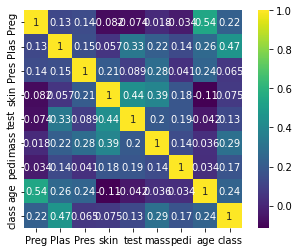

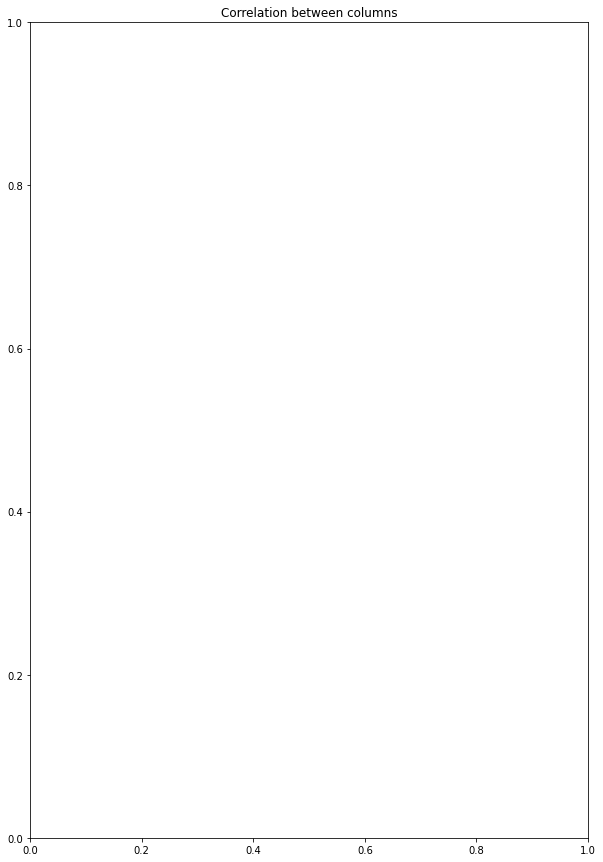

In [ ]:

import seaborn as sns
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.figure(figsize=(10,15))
plt.title("Correlation between columns")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['class'], axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=1)



In [ ]:
x_train

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [ ]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

replace = SimpleImputer(missing_values=0, strategy='mean')

cols = x_train.columns

x_train = pd.DataFrame(replace.fit_transform(x_train))
x_test = pd.DataFrame(replace.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_train.head()

,0,1,2,3,4,5,6,7
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [ ]:
x_test.head()

,0,1,2,3,4,5,6,7
0,7.0,136.0,74.0,26.00,135.000000,26.0,0.647,51.0
1,1.0,151.0,60.0,30.16,150.137405,26.1,0.179,22.0
2,6.0,109.0,60.0,27.00,150.137405,25.0,0.206,27.0
3,3.0,61.0,82.0,28.00,150.137405,34.4,0.243,46.0
4,1.0,116.0,78.0,29.00,180.000000,36.1,0.496,25.0


In [ ]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")

model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
model_score = model.score(x_test,y_test)
print(model_score)

0.7792207792207793


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

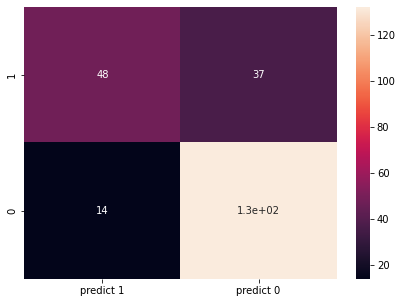

In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,0] )

df_cm = pd.DataFrame(cm, index=[i for i in ["1","0"]],
                          columns=[i for i in ["predict 1", "predict 0"]])

plt.figure(figsize=[7,5])
sns.heatmap(df_cm, annot=True)